# System Description and Analysis

This notebook models a simple spring loaded weapon system with two arm segments, one with the spring mounted to it and the other with the weapon mounted to it. The two arm segments have a fixed angle between them, and will have separate linear densities that, for the purposes of this model, are assumed to be constant. The spring arm has length $l_s$ and a linear density of $\lambda_s$. The weapon arm has a length of $l_w$ and a linear density of $\lambda_w$. The weapon itself has a mass of $m$ and a radius of $r$. The spring itself has a resting length of $l_r$ and a spring constant of $k$. Additionally, the spring is mounted in such the way that the length of the spring at its minimum throughout the rotation of the spring arm, $l_{min}$, is constrained be the inequality $l_r \le l_{min} \le 2 \left( l_r - l_s \right)$. The weapon is modeled as a disk with a constant density, a radius $r$ and a mass of $m$. Additionally, since the forces from the spring will be so high, the effects of gravity can be safely neglected.

In operation, the weapon system will be loaded by pulling the spring arm back so that the spring is at its maximum length, $l_{max}$. The spring arm will then be released, causing the spring to pull the weapon arm forward, transforming the elastic potential energy stored in the spring into rotational kinetic energy and driving the weapon system into the enemy robot at high speed. The goal of this model is to determine the optimal values of $l_s$, $l_r$, $l_{min}$, and $k$ for any given values of $\lambda_s$, $\lambda_w$, $l_w$, $m$, and $r$ that will yield a tip velocity greater than or equal to some minimum value, $v_{min}$, while minimizing the maximum torque $\tau$, radial force $F_r$, and angular force $F_\theta$ experienced by the spring arm throughout the entire rotation from its fully loaded loaded position to impact. For the following equations, $l_{min}$ will occur at $\theta = 0$ and $l_{max}$ will occur at $\theta = \pi$.

## Calculating Torque

Since this is a relatively complicated system in a radial coordinate system, it will be modeled using Lagrangian mechanics. The general form of the Lagrangian is given by Equation 1 below, where $L$ is the Lagrangian, $T$ is the kinetic energy, $U$ is the potential energy, and $\omega = \frac{d \theta}{dt}$ is the angular velocity of the spring arm.

\begin{equation}
\tag{1}
\mathcal{L}(\theta, \omega) = T(\theta, \omega) - U(\theta, \omega)
\end{equation}

In the case of this system, the kinetic energy is caused entirely by the rotational motion of the spring arm, weapon arm, and weapon disk and the potential energy is caused entirely by the elastic potential energy stored in the spring. However, in order to calculate the kinetic energy of the spring arm it is necessary to know the moment of inertia of the weapon system. This is given in Equation 2.

\begin{equation}
\tag{2}
I = \frac{1}{3} \lambda_s l_s^3 + \frac{1}{3} \lambda_w l_w^3 + \frac{1}{2} m r^2 + m l_w^2
\end{equation}

The kinetic energy of the spring arm is given by Equation 3.

\begin{equation}
\tag{3}
T(\theta, \omega) = \frac{1}{2} I \omega^2
\end{equation}

To calculate the potential energy of the spring, the length of the spring at any given angle $\theta$ must be calculated first. This is given by Equation 4.

\begin{equation}
\tag{4}
L(\theta) = \sqrt{l_s^2 + (l_s + l_{min})^2 - 2 l_s (l_s + l_{min}) \cos(\theta)}
\end{equation}

Once Equation 4 is found, it is possible to find the potential energy stored in the spring as shown in Equation 5.

\begin{equation}
\tag{5}
U(\theta, \omega) = \frac{1}{2} k \left( L(\theta) - l_r \right)^2
\end{equation}

Next, the partial derivative's of the Lagrangian with respect to $\theta$ and $\omega$ must be found. These are given by Equations 6 and 7.

\begin{equation}
\tag{6}
\frac{\partial \mathcal{L}}{\partial \theta} = -\frac{k l_s (l_s + l_{min}) \sin(\theta) \left( L(\theta) - l_r \right)}{L(\theta)}

\end{equation}

\begin{equation}
\tag{7}
\frac{\partial \mathcal{L}}{\partial \omega} = I \omega
\end{equation}

From these two equations, the full Euler-Lagrange equation can be found as shown in Equation 8, where $\alpha = \frac{d \omega}{dt}$ is the angular acceleration of the spring arm.

\begin{equation}
\tag{8}
I \alpha = -\frac{k l_s (l_s + l_{min}) \sin(\theta) \left( L(\theta) - l_r \right)}{L(\theta)}
\end{equation}

And since torque is defined as the moment of inertia times the angular acceleration, Equation 8 can be rewritten as Equation 9 to solve for the torque at any given angle $\theta$.

\begin{equation}
\tag{9}
\tau(\theta) = -\frac{k l_s \sin(\theta) (l_s + l_{min}) \left( L(\theta) - l_r \right)}{L(\theta)}
\end{equation}

## Calculating Radial and Angular Forces

Since the spring force is conservative and dependant only on the position of the spring arm, it is possible to calculate the magnitude of the total force exerted by the spring on the spring arm at any given angle $\theta$ by subtracting the resting length of the spring from the length of the spring at that angle and multiplying by the spring constant. This is shown in Equation 10.

\begin{equation}
\tag{10}
\left\lVert \vec{F}(\theta) \right\rVert = k (L(\theta) - l_r)
\end{equation}

Since the length of the spring arm, the location of the spring mounting point, and the angle of the spring arm are all known, it is possible to find the angle $\phi$ between the force vector $\vec{F}(\theta)$ and the tangent vector using the law of sines or the law of cosines. Both of these forms are shown in Equations 11 and 12 respectively.

\begin{equation}
\tag{11}
\phi = \cos^{-1} \left( \frac{\sin(\theta) (l_s + l_{min})}{L(\theta)} \right)
\end{equation}

\begin{equation}
\tag{12}
\phi = \sin^{-1} \left( \frac{(l_s + l_{min})^2 - l_s^2 - L(\theta)^2}{2 l_s L(\theta)} \right)
\end{equation}

Using these two forms of $\phi$, it is possible to find the radial and angular components of the force vector $\vec{F}(\theta)$ as shown in Equations 13 and 14.

\begin{equation}
\tag{13}
F_r(\theta) = \frac{k \sin(\theta) (l_s + l_{min}) (L(\theta) - l_r)}{L(\theta)}
\end{equation}

\begin{equation}
\tag{14}
F_\theta(\theta) = \frac{k (L(\theta) - l_r) ((l_s + l_{min})^2 - l_s^2 - L(\theta)^2)}{2 l_s L(\theta)}
\end{equation}

## Calculating Tip Velocity

Assuming a lossless system, the maximum rotational kinetic energy will be equal to the difference in potential energies at the maximum and minimum angles. This is shown in Equation 15.

\begin{equation}
\tag{15}
T(\omega_{max}) = U(\pi) - U(0)
\end{equation}

Substituting the values for $T(\omega)$ and $U(\theta)$ from Equations 3 and 5 into Equation 15 yields Equation 16.

\begin{equation}
\tag{16}
\frac{1}{2} I \omega_{max}^2 = \frac{1}{2} k \left( L(\pi) - l_r \right)^2 - \frac{1}{2} k \left( L(0) - l_r \right)^2
\end{equation}

Solving Equation 16 for $\omega_{max}$ yields Equation 17.

\begin{equation}
\tag{17}
\omega_{max} = \sqrt{\frac{k \left( L(\pi) - l_r \right)^2 - k \left( L(0) - l_r \right)^2}{I}}
\end{equation}

And finally, since $v = r \omega$, the linear velocity of the end of the weapon arm, $v_{max}$, is given by Equation 18.

\begin{equation}
\tag{18}
v_{max} = l_w \sqrt{\frac{k \left( L(\pi) - l_r \right)^2 - k \left( L(0) - l_r \right)^2}{I}}
\end{equation}


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize
from multiprocessing import Pool
from itertools import product, repeat

from springlock import Springlock

# Optimization parameters

The following options are available for optimization. All units will be converted to SI units automatically by the backend before optimization.


## Fixed parameters

- `weapon_mass`: The mass of the weapon in pounds
- `weapon_radius`: The radius of the weapon in inches
- `weapon_arm_length`: The length of the weapon arm in inches
- `weapon_arm_density`: The linear density of the weapon arm in pounds per inch
- `spring_arm_density`: The linear density of the spring arm in pounds per inch

## Variable parameters

- `min_spring_length`: The minimum resting length of the spring in inches
- `max_spring_length`: The maximum resting length of the spring in inches
- `min_spring_constant`: The minimum spring constant of the spring in pounds per inch
- `max_spring_constant`: The maximum spring constant of the spring in pounds per inch
- `min_spring_arm_length`: The minimum length of the spring arm in inches
- `max_spring_arm_length`: The maximum length of the spring arm in inches
- `max_spring_extension_ratio`: The maximum extension ratio of the spring with respect to its resting length. Dimensionless.

# Optimization objective

- `target_speed`: The target speed of the weapon at impact in mph. The optimization will attempt to find a set of system parameters that will result in the smallest maximum torque while still achieving the target speed.


In [8]:
# Minimum and maximum system parameters
min_weapon_mass = 6 # lb
max_weapon_mass = 9.5 # lb
min_weapon_radius = 10 # in
max_weapon_radius = 14 # in
min_spring_constant = 1 # lbf/in
max_spring_constant = 2e3 # lbf/in
min_spring_radius = 1 # in
max_spring_radius = 14 # in
min_tip_to_spring = 4 # in
min_spring_resting_angle = -60 # degrees
max_spring_resting_angle = 90 # degrees
min_spring_mounting_point_x = -6 # in
max_spring_mounting_point_x = 6 # in
min_spring_mounting_point_y = -4 # in
max_spring_mounting_point_y = 4 # in
min_impact_angle = -15 # degrees
max_impact_angle = 15 # degrees
min_release_angle = 60 # degrees
max_release_angle = 180 # degrees

# These values are for extension springs
spring_compression_ratio = 0.99 # dimensionless
spring_extension_ratio = 2.5 # dimensionless

# These values are for compression springs
# spring_compression_ratio = 0.5 # dimensionless
# spring_extension_ratio = 1.01 # dimensionless

target_speed = 100 # mph

units = {
    'angle_units': 'deg',
    'speed_units': 'mph',
    'length_units': 'in',
    'spring_constant_units': 'lbf/in',
    'torque_units': 'lbf*ft',
    'mass_units': 'lb'
}

In [9]:
genome_size = 7

genome_mapping = [
    'weapon_mass',
    'weapon_radius',
    'spring_constant',
    'spring_radius',
    'spring_resting_angle',
    'spring_mounting_point'
]

genome_ranges = [
    (min_weapon_mass, max_weapon_mass),
    (min_weapon_radius, max_weapon_radius),
    (min_spring_constant, max_spring_constant),
    (min_spring_radius, max_spring_radius),
    (min_spring_resting_angle, max_spring_resting_angle),
    (min_spring_mounting_point_x, max_spring_mounting_point_x),
    (min_spring_mounting_point_y, max_spring_mounting_point_y)
]

def smooth_error(value, minimum, maximum):
    if value < minimum:
        return (minimum - value) ** 2
    elif value > maximum:
        return (value - maximum) ** 2
    else:
        return 0

def loss_func(genome, target_speed):
    genome = [*genome[:-2], (genome[-2], genome[-1])]
    genome_dict = dict(zip(genome_mapping, genome))
    springlock = Springlock(**genome_dict, **units)

    # If all the values are within the bounds, the fitness is one over the torque
    # Otherwise, the fitness is the negative sum of how bad all the violations are
    loss = 0

    loss += smooth_error(springlock.weapon_mass, min_weapon_mass, max_weapon_mass)
    loss += smooth_error(springlock.weapon_radius, min_weapon_radius, max_weapon_radius)
    loss += smooth_error(springlock.spring_constant, min_spring_constant, max_spring_constant)
    loss += smooth_error(springlock.spring_radius, min_spring_radius, max_spring_radius)
    loss += smooth_error(springlock.tip_to_spring, min_tip_to_spring, np.inf)
    loss += smooth_error(springlock.spring_resting_angle, min_spring_resting_angle, max_spring_resting_angle)
    loss += smooth_error(springlock.spring_mounting_point[0], min_spring_mounting_point_x, max_spring_mounting_point_x)
    loss += smooth_error(springlock.spring_mounting_point[1], min_spring_mounting_point_y, max_spring_mounting_point_y)
    loss += smooth_error(springlock.impact_angle, min_impact_angle, max_impact_angle)
    loss += smooth_error(springlock.release_angle, min_release_angle, max_release_angle)
    loss += smooth_error(springlock.max_spring_length / springlock.resting_spring_length, spring_compression_ratio, spring_extension_ratio)
    loss += smooth_error(springlock.max_speed, target_speed, np.inf) * 100
    
    loss -= min(1 / abs(springlock.max_torque), 1e3)

    return loss

In [10]:
def optimize_fitness(initial_guess, target_speed):
        return minimize(loss_func, args=(target_speed,), x0=initial_guess, bounds=genome_ranges, method='Powell', options={'maxiter': 10000})

def get_min_torque(target_speed):
    initial_guess_point_counts = [1, 1, 2, 3, 4, 4, 4]

    initial_guess_points = [
        np.linspace(
            genome_ranges[i][0], genome_ranges[i][1], initial_guess_point_counts[i] + 2
        )[1:-1]
        for i in range(genome_size)
    ]

    initial_guesses = list(product(*initial_guess_points))
    optimization_args = zip(initial_guesses, repeat(target_speed))

    with Pool() as pool:
        results = pool.starmap(optimize_fitness, optimization_args)

    # Get the best result by fitness
    return min(results, key=lambda x: x.fun)

best_result = get_min_torque(target_speed)
best_genome = best_result.x

print(f'Best result: {best_result.fun}')

Best result: -0.0009160823220213713


In [109]:
# print(f"Best genome: {best_genome}")

# Run the simulation with the best genome
genome = [*best_genome[:-2], (best_genome[-2], best_genome[-1])]
genome_dict = dict(zip(genome_mapping, genome))
# print(genome_dict)
springlock = Springlock(**genome_dict, **units)

# springlock.length_units = 'in'
# springlock.mass_units = 'lb'
# springlock.torque_units = 'lbf*ft'
# springlock.spring_constant_units = 'lbf/in'
# springlock.speed_units = 'mph'

print(f'Arm length is {springlock.weapon_radius:.2f} {springlock.length_units}')
print(f'Weapon mass is {springlock.weapon_mass:.2f} {springlock.mass_units}')
print(f'Spring radius is {springlock.spring_radius} {springlock.length_units}')
print(f'Spring tip to spring distance is {springlock.tip_to_spring:.2f} {springlock.length_units}')
print(f'Spring mounting point x is {springlock.spring_mounting_point_x} {springlock.length_units}')
print(f'Spring mounting point y is {springlock.spring_mounting_point_y} {springlock.length_units}')

print(f'Release angle is {springlock.release_angle:.2f} {springlock.angle_units}')
print(f'Impact angle is {springlock.impact_angle:.2f} {springlock.angle_units}')
print(f'Impact speed is {springlock.max_speed:.2f} {springlock.speed_units}')
print(f'Stored energy is {springlock.max_potential_energy:.2f} {springlock.energy_units}')
print(f'Maximum torque is {springlock.max_torque:.2f} {springlock.torque_units}')
print(f'Maximum torque is at {springlock.max_torque_theta:.2f} {springlock.angle_units}')
print(f'Spring constant is {springlock.spring_constant:.2f} {springlock.spring_constant_units}')
print(f'Spring resting angle is {springlock.spring_resting_angle:.2f} {springlock.angle_units}')
print(f'Spring length at rest is {springlock.spring_length(springlock.spring_resting_angle):.2f} {springlock.length_units}')

# Find the minimum and maximum spring lengths
lower_bound = min(springlock.impact_angle, springlock.release_angle)
upper_bound = max(springlock.impact_angle, springlock.release_angle)

spring_min_length = minimize_scalar(lambda x: springlock.spring_length(x), bounds=(lower_bound, upper_bound), method='bounded').fun
spring_max_length = -minimize_scalar(lambda x: -springlock.spring_length(x), bounds=(lower_bound, upper_bound), method='bounded').fun

print(f'Minimum spring length is {spring_min_length:.2f} {springlock.length_units}')
print(f'Maximum spring length is {spring_max_length:.2f} {springlock.length_units}')

Arm length is 14.00 in
Weapon mass is 6.14 lb
Spring radius is 7.692772586062335 in
Spring tip to spring distance is 6.31 in
Spring mounting point x is 5.999461497714565 in
Spring mounting point y is 0.0028321857865573983 in
Release angle is 179.71 deg
Impact angle is -5.36 deg
Impact speed is 100.00 mph
Stored energy is 2781.44 J
Maximum torque is 1091.60 lbf*ft
Maximum torque is at 94.84 deg
Spring constant is 342.66 lbf/in
Spring resting angle is -1.66 deg
Spring length at rest is 1.71 in
Minimum spring length is 1.69 in
Maximum spring length is 13.69 in


Maximum torque angle is 94.84 deg


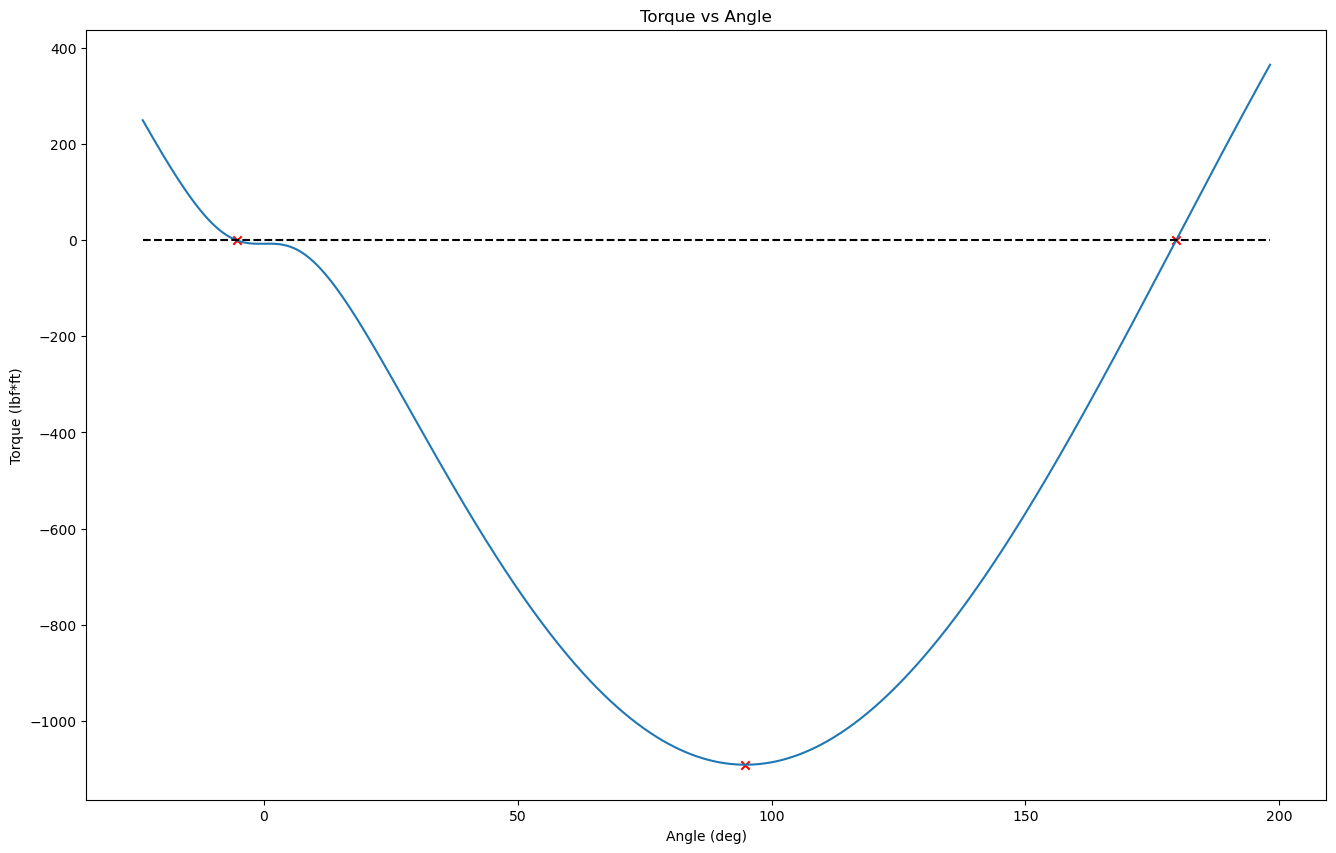

In [102]:
# Create a plot of the torque vs angle from the release angle to the impact angle, with a 10% margin on either side

release_angle = springlock.release_angle
impact_angle =  springlock.impact_angle
max_torque_angle = springlock.max_torque_theta
print(f'Maximum torque angle is {max_torque_angle:.2f} {springlock.angle_units}')

margin = 0.1 * (impact_angle - release_angle)
angles = np.linspace(impact_angle + margin, release_angle - margin, 1000)
torques = [springlock.torque(angle) for angle in angles]



plt.plot(angles, torques)
plt.xlabel(f'Angle ({springlock.angle_units})')
plt.ylabel(f'Torque ({springlock.torque_units})')
plt.title('Torque vs Angle')
plt.scatter([release_angle, impact_angle, max_torque_angle], [springlock.torque(release_angle), springlock.torque(impact_angle), springlock.torque(max_torque_angle)], marker='x', color='red')
plt.plot([min(angles), max(angles)], [0, 0], color='black', linestyle='--')
plt.gcf().set_size_inches(16, 10)
plt.show()

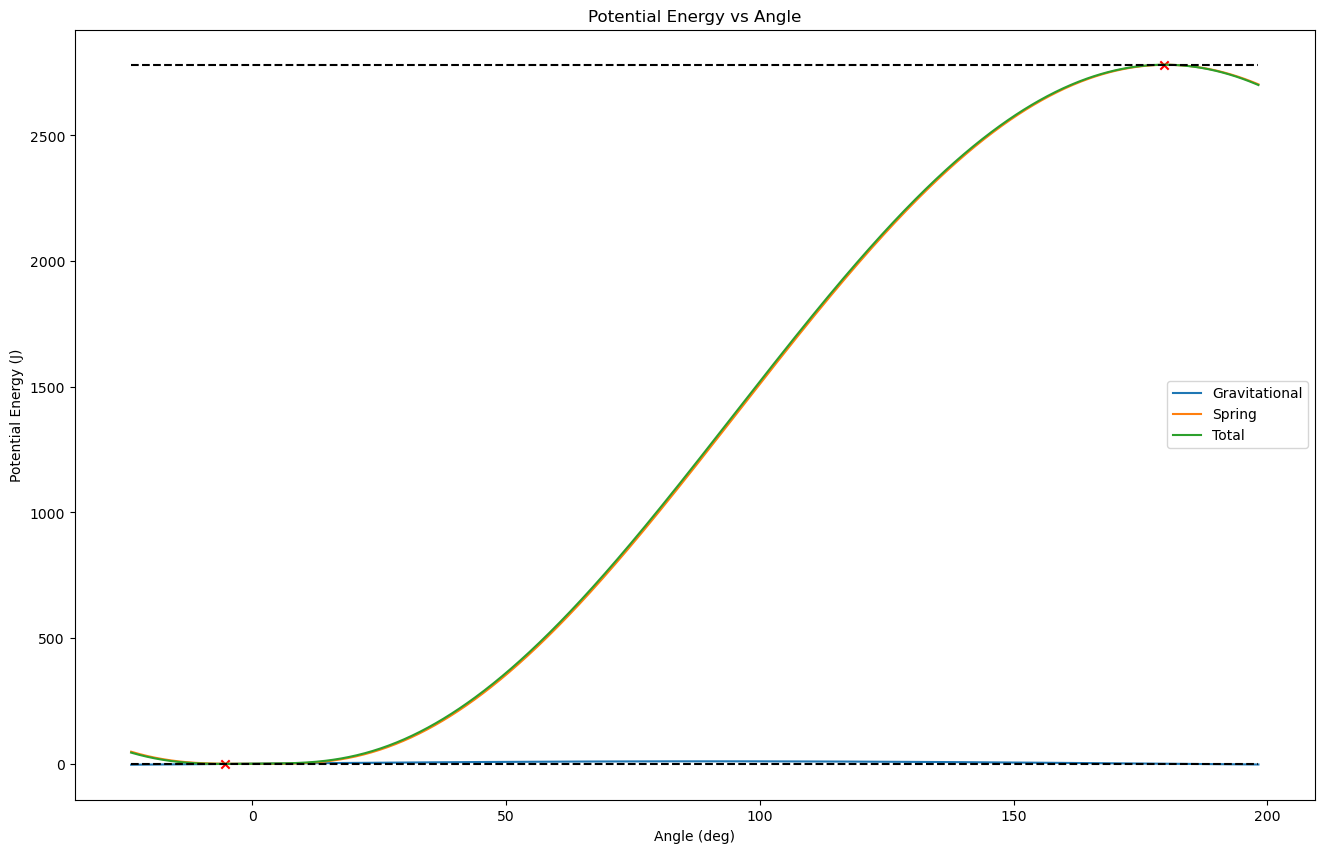

In [103]:
# Create a plot of the total, gravitional, and spring energy vs angle from the release angle to the impact angle with a 10% margin on either side
margin = 0.1 * (springlock.impact_angle - springlock.release_angle)
angles = np.linspace(springlock.impact_angle + margin, springlock.release_angle - margin, 1000)
total_energies = [springlock.total_potential_energy(angle) for angle in angles]
gravitational_energies = [springlock.gravitational_potential_energy(angle) for angle in angles]
spring_energies = [springlock.spring_potential_energy(angle) for angle in angles]

plt.plot(angles, gravitational_energies)
plt.plot(angles, spring_energies)
plt.plot(angles, total_energies)
plt.scatter([springlock.release_angle, springlock.impact_angle], [springlock.total_potential_energy(springlock.release_angle), springlock.total_potential_energy(springlock.impact_angle)], marker='x', color='red')
plt.plot([min(angles), max(angles)], [springlock.total_potential_energy(springlock.release_angle), springlock.total_potential_energy(springlock.release_angle)], color='black', linestyle='--')
plt.plot([min(angles), max(angles)], [springlock.total_potential_energy(springlock.impact_angle), springlock.total_potential_energy(springlock.impact_angle)], color='black', linestyle='--')
plt.legend(['Gravitational', 'Spring', 'Total'])
plt.xlabel(f'Angle ({springlock.angle_units})')
plt.ylabel(f'Potential Energy ({springlock.energy_units})')
plt.title('Potential Energy vs Angle')
plt.gcf().set_size_inches(16, 10)
plt.show()

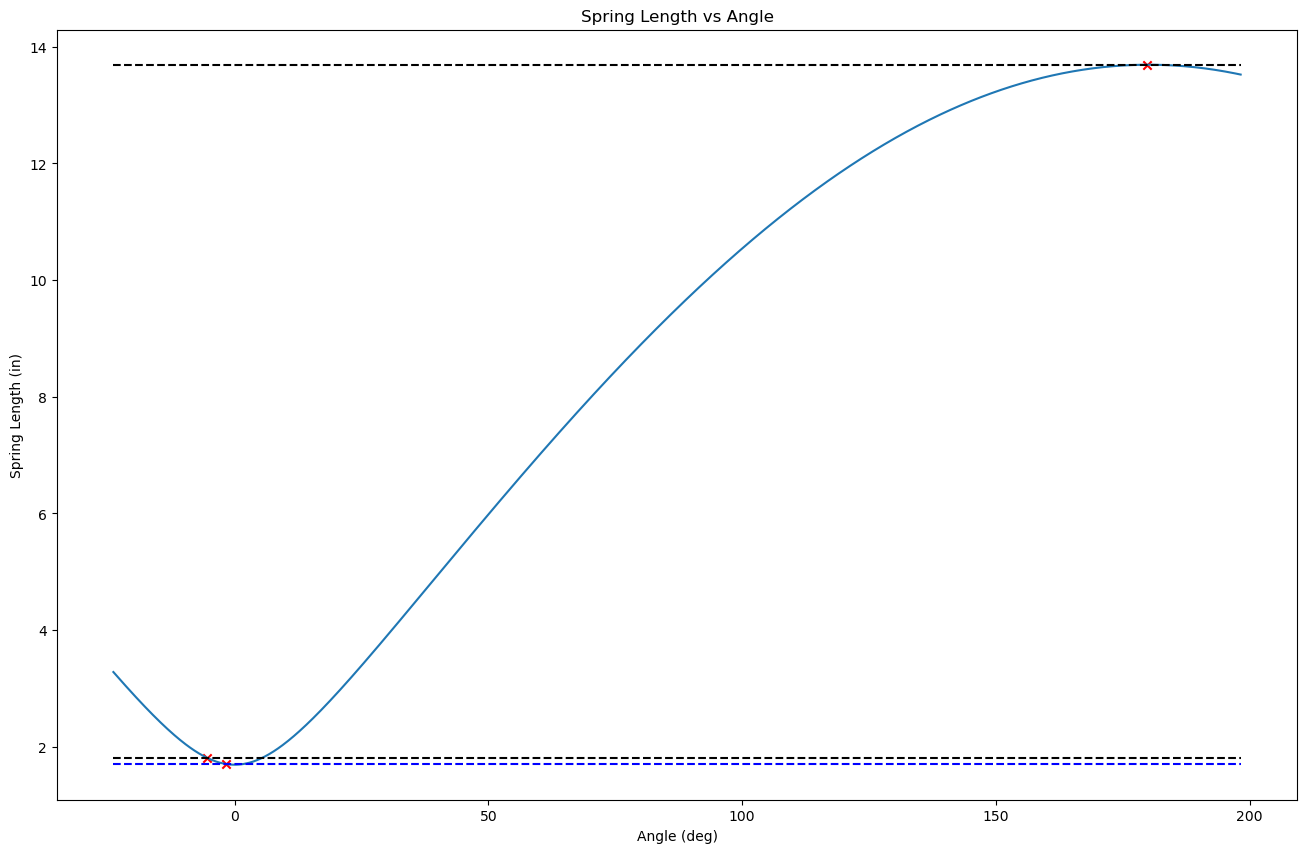

In [104]:
# Plot the spring length vs angle from the release angle to the impact angle with a 10% margin on either side
margin = 0.1 * (springlock.impact_angle - springlock.release_angle)
angles = np.linspace(springlock.impact_angle + margin, springlock.release_angle - margin, 1000)
lengths = [springlock.spring_length(angle) for angle in angles]

plt.plot(angles, lengths)
plt.scatter([springlock.release_angle, springlock.impact_angle], [springlock.spring_length(springlock.release_angle), springlock.spring_length(springlock.impact_angle)], marker='x', color='red')
plt.scatter([springlock.spring_resting_angle], [springlock.spring_length(springlock.spring_resting_angle)], marker='x', color='red')
plt.plot([min(angles), max(angles)], [springlock.spring_length(springlock.spring_resting_angle), springlock.spring_length(springlock.spring_resting_angle)], color='blue', linestyle='--')
plt.plot([min(angles), max(angles)], [springlock.spring_length(springlock.release_angle), springlock.spring_length(springlock.release_angle)], color='black', linestyle='--')
plt.plot([min(angles), max(angles)], [springlock.spring_length(springlock.impact_angle), springlock.spring_length(springlock.impact_angle)], color='black', linestyle='--')
plt.xlabel(f'Angle ({springlock.angle_units})')
plt.ylabel(f'Spring Length ({springlock.length_units})')
plt.title('Spring Length vs Angle')
plt.gcf().set_size_inches(16, 10)
plt.show()

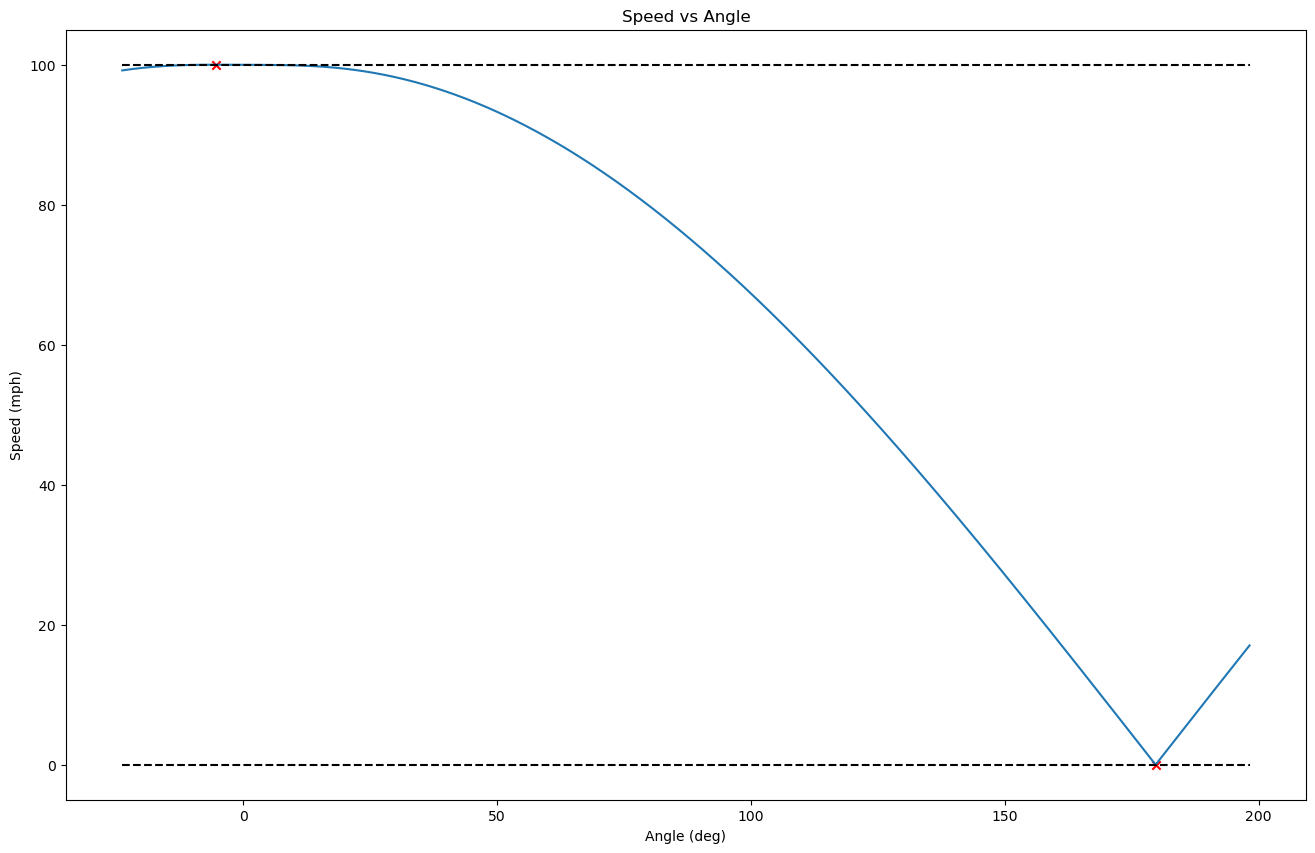

In [105]:
# Plot the speed vs angle from the release angle to the impact angle with a 10% margin on either side
margin = 0.1 * (springlock.impact_angle - springlock.release_angle)
angles = np.linspace(springlock.impact_angle + margin, springlock.release_angle - margin, 1000)
speeds = [springlock.speed(angle) for angle in angles]

plt.plot(angles, speeds)
plt.scatter([springlock.release_angle, springlock.impact_angle], [springlock.speed(springlock.release_angle), springlock.speed(springlock.impact_angle)], marker='x', color='red')
plt.plot([min(angles), max(angles)], [springlock.speed(springlock.release_angle), springlock.speed(springlock.release_angle)], color='black', linestyle='--')
plt.plot([min(angles), max(angles)], [springlock.speed(springlock.impact_angle), springlock.speed(springlock.impact_angle)], color='black', linestyle='--')
plt.xlabel(f'Angle ({springlock.angle_units})')
plt.ylabel(f'Speed ({springlock.speed_units})')
plt.title('Speed vs Angle')
plt.gcf().set_size_inches(16, 10)
plt.show()

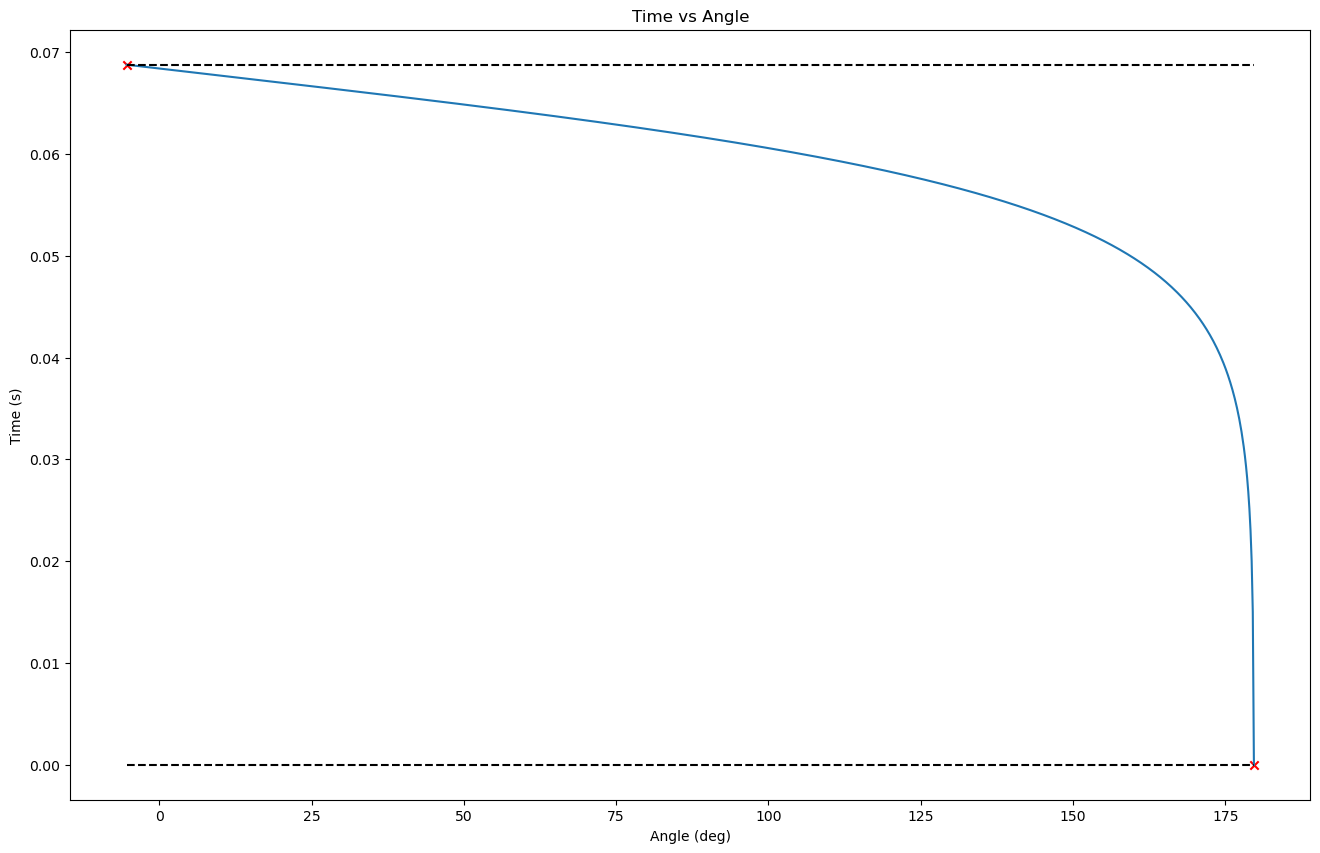

The time to reach the impact angle is ~68.76 ms


In [115]:
# Plot the time to reach an angle based on the angular velocity function
angles = np.linspace(springlock.release_angle, springlock.impact_angle, 1000)
angular_velocities = [springlock.angular_velocity(angle) for angle in angles]
times = np.zeros(len(angles))

# Use trapazoidal approximation to fill out the times array
for i in range(1, len(angles)):
    times[i] = times[i - 1] - (angles[i] - angles[i - 1]) / (angular_velocities[i] + angular_velocities[i - 1])

plt.plot(angles, times)
plt.scatter([springlock.release_angle, springlock.impact_angle], [0, max(times)], marker='x', color='red')
plt.plot([min(angles), max(angles)], [0, 0], color='black', linestyle='--')
plt.plot([min(angles), max(angles)], [max(times), max(times)], color='black', linestyle='--')
plt.xlabel(f'Angle ({springlock.angle_units})')
plt.ylabel(f'Time (s)')
plt.title('Time vs Angle')
plt.gcf().set_size_inches(16, 10)
plt.show()

print(f'The time to reach the impact angle is ~{max(times) * 1000:.2f} ms')


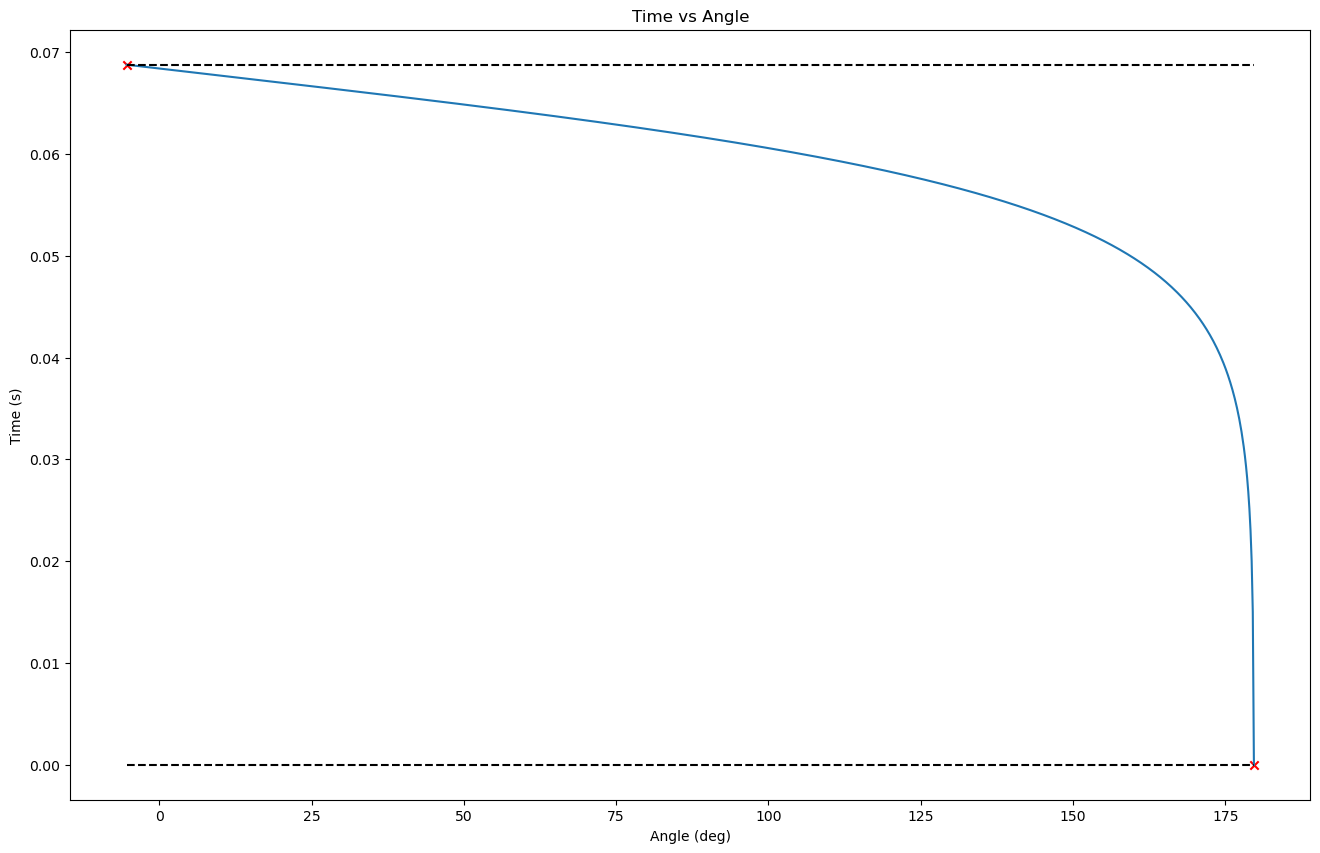

The time to reach the impact angle is ~68.76 ms


In [ ]:
# Plot the time to reach an angle based on the angular velocity function
angles = np.linspace(springlock.release_angle, springlock.impact_angle, 1000)
angular_velocities = [springlock.angular_velocity(angle) for angle in angles]
times = np.zeros(len(angles))

# Use trapazoidal approximation to fill out the times array
for i in range(1, len(angles)):
    times[i] = times[i - 1] - (angles[i] - angles[i - 1]) / (angular_velocities[i] + angular_velocities[i - 1])

plt.plot(angles, times)
plt.scatter([springlock.release_angle, springlock.impact_angle], [0, max(times)], marker='x', color='red')
plt.plot([min(angles), max(angles)], [0, 0], color='black', linestyle='--')
plt.plot([min(angles), max(angles)], [max(times), max(times)], color='black', linestyle='--')
plt.xlabel(f'Angle ({springlock.angle_units})')
plt.ylabel(f'Time (s)')
plt.title('Time vs Angle')
plt.gcf().set_size_inches(16, 10)
plt.show()

print(f'The time to reach the impact angle is ~{max(times) * 1000:.2f} ms')


In [ ]:
# Plot a heat map of the torque as the x and y mounting points vary tp +/- 10% of the calculated optimimum

# Create all the points in the grid
num_samples = 200
num_ticks = 5
sample_range = 0.5
original_x = springlock.spring_mounting_point_x
original_y = springlock.spring_mounting_point_y
original_torque = springlock.max_torque
min_x = springlock.spring_mounting_point_x - 0.5 * springlock.spring_mounting_point_x
max_x = springlock.spring_mounting_point_x + 0.5 * springlock.spring_mounting_point_x
min_y = springlock.spring_mounting_point_y - 0.5 * springlock.spring_mounting_point_y
max_y = springlock.spring_mounting_point_y + 0.5 * springlock.spring_mounting_point_y
x_offsets = np.linspace(min_x, max_x, num_samples)
y_offsets = np.linspace(min_y, max_y, num_samples)

# Create a grid of the points
x_offsets, y_offsets = np.meshgrid(x_offsets, y_offsets)

# Calculate the torques at each point
torques = np.zeros_like(x_offsets)

for i in range(len(x_offsets)):
    for j in range(len(y_offsets[0])):
        springlock.spring_mounting_point_x = x_offsets[i][j]
        springlock.spring_mounting_point_y = y_offsets[i][j]
        
        torques[i][j] = springlock.max_torque

        if springlock.max_speed < target_speed:
            torques[i][j] = None
        
        if springlock.release_angle > max_release_angle or springlock.impact_angle < min_impact_angle:
            torques[i][j] = None

        if springlock.impact_angle > max_impact_angle or springlock.release_angle < min_release_angle:
            torques[i][j] = None


# Reset the mounting points
springlock.spring_mounting_point_x = original_x
springlock.spring_mounting_point_y = original_y





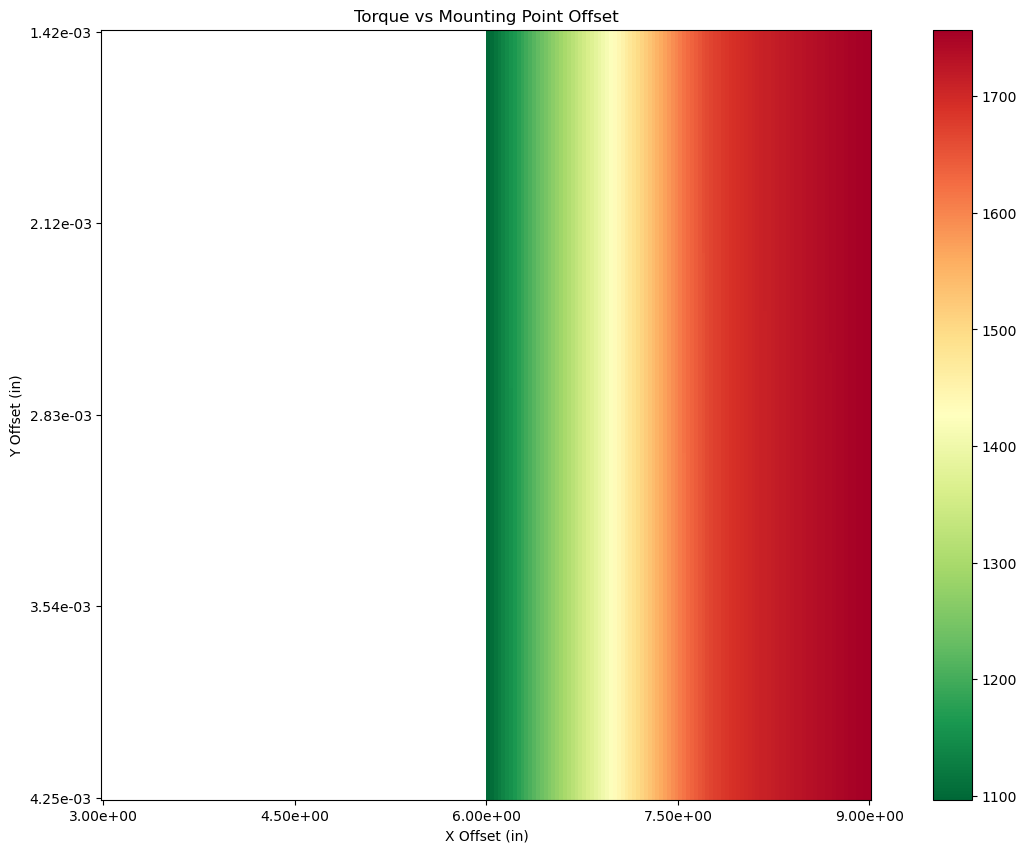

In [ ]:
# Plot the torques
plt.imshow(torques, cmap='RdYlGn_r', interpolation='nearest')
plt.colorbar()
plt.xlabel(f'X Offset ({springlock.length_units})')
plt.ylabel(f'Y Offset ({springlock.length_units})')
plt.title('Torque vs Mounting Point Offset')
plt.gcf().set_size_inches(16, 10)
plt.xticks(np.linspace(0, num_samples - 1, num_ticks), [f'{i:.2e}' for i in np.linspace(min_x, max_x, num_ticks)])
plt.yticks(np.linspace(0, num_samples - 1, num_ticks), [f'{i:.2e}' for i in np.linspace(min_y, max_y, num_ticks)])


plt.show()

In [ ]:
# # Find the minumum torque for all target speeds between 1 and 100 mph
# min_target_speed = 1
# max_target_speed = 100
# num_target_speeds = 20
# target_speeds = np.linspace(min_target_speed, max_target_speed, num_target_speeds)
# min_torques = np.zeros_like(target_speeds)

# for i in tqdm(range(len(target_speeds)), desc=f'Torque optimization for {min_target_speed}-{max_target_speed} mph targets'):
#     target_speed = target_speeds[i]
#     best_result = get_min_torque(target_speed)
#     best_genome = best_result.x

#     genome = [*best_genome[:-2], (best_genome[-2], best_genome[-1])]
#     genome_dict = dict(zip(genome_mapping, genome))
#     springlock = Springlock(**genome_dict, **units)

#     min_torques[i] = springlock.max_torque

    

Torque optimization for 1-100 mph targets:  60%|██████    | 12/20 [08:19<05:33, 41.65s/it]


KeyboardInterrupt: 

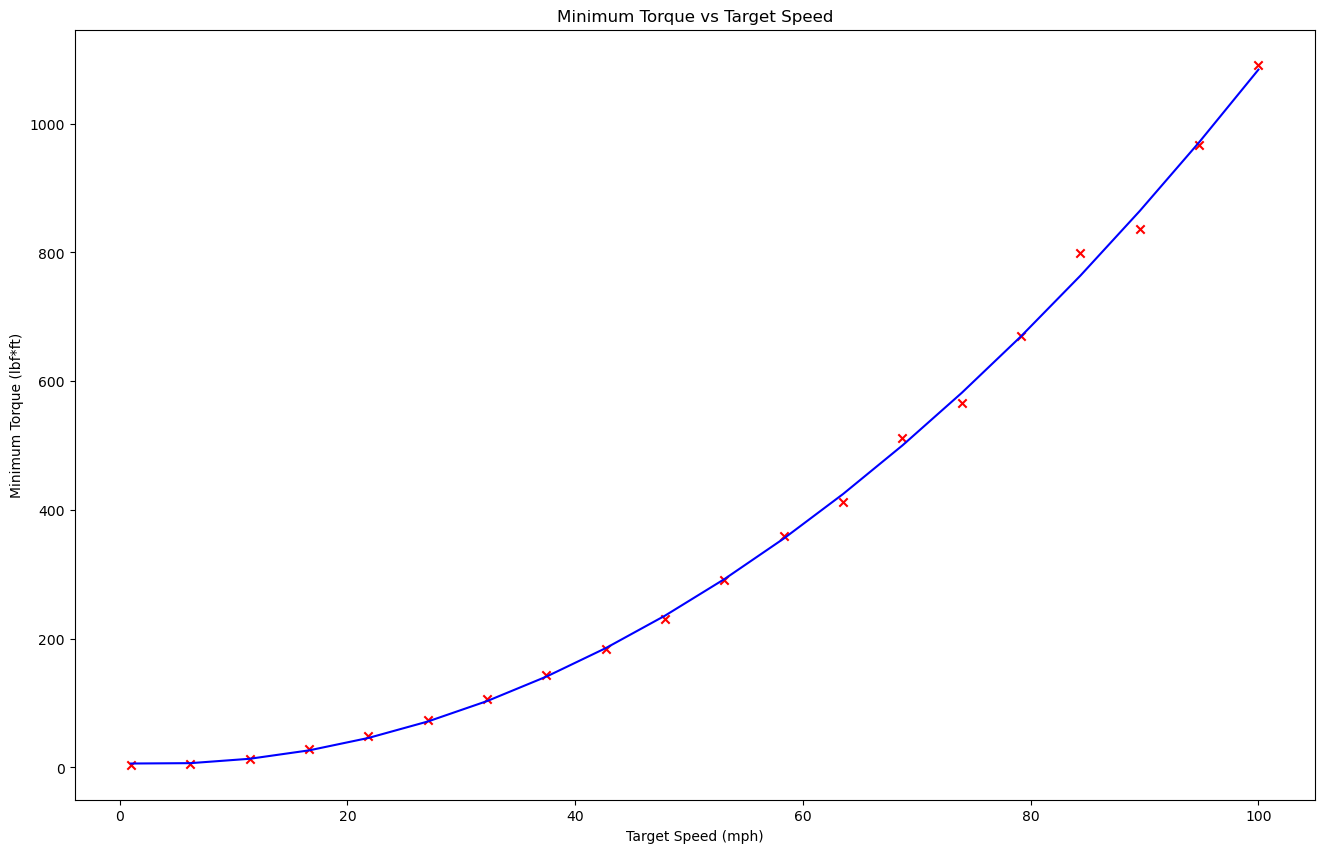

In [ ]:
# # Create a best fit quadratic curve
# def quadratic(x, a, b, c):
#     return a * x ** 2 + b * x + c

# popt, pcov = curve_fit(quadratic, target_speeds, min_torques)

# # Plot the torques
# plt.scatter(target_speeds, min_torques, label='Minimum Torque', color='red', marker='x')
# plt.plot(target_speeds, quadratic(target_speeds, *popt), label='Best Fit Quadratic Curve', color='blue')
# plt.xlabel(f'Target Speed ({springlock.speed_units})')
# plt.ylabel(f'Minimum Torque ({springlock.torque_units})')
# plt.title('Minimum Torque vs Target Speed')
# plt.gcf().set_size_inches(16, 10)
# plt.show()

In [ ]:
# what_if_speed = 182 # mph
# what_if_torque = quadratic(what_if_speed, *popt)

# print(f'Estimated minimum torque for {what_if_speed} {units["speed_units"]} imoact speed: {what_if_torque:.2f} {units["torque_units"]}')

Estimated minimum torque for 182 mph imoact speed: 3682.29 lbf*ft
